In [208]:
# Praca domowa nr 5
import pandas as pd
import numpy as np

path1 = "data/Comments.csv.gz"
path2 = "data/Posts.csv.gz"
path3 = "data/Users.csv.gz"

df_comments = pd.read_csv(path1)
df_posts = pd.read_csv(path2)
df_users = pd.read_csv(path3)

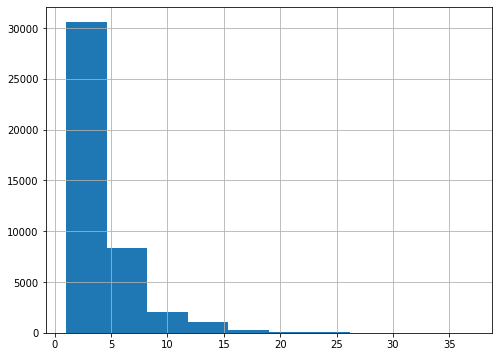

In [207]:
# Zadanie 1.

df_comments.groupby('PostId').count()['Id'].hist(figsize=(8,6))

In [206]:
# Zadanie 2.

id_vcsum_max = df_posts.groupby('OwnerUserId')\
    .sum()\
    .reset_index()\
    .sort_values(by='ViewCount',ascending=False)\
    .iloc[0,0]

df_users.loc[df_users['AccountId']==id_vcsum_max,'DisplayName'].values[0]

'hitec'

In [205]:
# Zadanie 3.

acc_answers = df_posts[df_posts['AcceptedAnswerId'].isnull()==False][['AcceptedAnswerId']]\
    .merge(df_posts[['Id','Score','ParentId','OwnerUserId']], left_on='AcceptedAnswerId', right_on='Id')

index = acc_answers.groupby('OwnerUserId').count()['ParentId'].sort_values(ascending=False).reset_index().iloc[1,0]

df_users[df_users['Id']==index]['DisplayName'].values[0]

'jpatokal'

In [204]:
# Zadanie 4.

max_score_id = df_posts.groupby('ParentId')['Score'].max().reset_index()

questions = df_posts[df_posts['PostTypeId']==1]

score_comp = df_posts[df_posts['AcceptedAnswerId'].isnull()==False][['AcceptedAnswerId']]\
    .merge(df_posts[['Id','Score','ParentId']], left_on='AcceptedAnswerId', right_on='Id')\
    .merge(max_score_id[['Score','ParentId']], left_on='ParentId',right_on='ParentId', suffixes=("_zaakceptowane","_maksymalne"))

len(score_comp[score_comp['Score_zaakceptowane']<score_comp['Score_maksymalne']])/len(questions)*100

4.099266156395486